In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train1',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

    
)

Found 2538 files belonging to 3 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2538 files belonging to 3 classes.


In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[ 15.34375     9.34375    13.34375  ]
   [ 17.625      11.625      13.625    ]
   [ 15.318359    9.318359    9.318359 ]
   ...
   [ 19.78125    10.78125    13.78125  ]
   [ 14.041016    8.041016   10.041016 ]
   [ 13.763672    9.763672   10.763672 ]]

  [[ 21.71875    15.71875    19.65625  ]
   [ 21.09375    15.09375    17.09375  ]
   [ 20.166016   14.166016   14.228516 ]
   ...
   [ 17.5625      8.5625     11.5625   ]
   [ 14.96875     8.96875    10.96875  ]
   [ 13.333984    9.333984   10.333984 ]]

  [[ 21.042969   15.042969   17.042969 ]
   [ 23.5625     17.5625     19.5625   ]
   [ 23.908203   17.908203   19.908203 ]
   ...
   [ 19.158203   10.158203   13.158203 ]
   [ 14.861328    8.861328   10.861328 ]
   [ 16.         12.         13.       ]]

  ...

  [[ 31.925781   20.925781   26.925781 ]
   [ 13.761719    4.7617188   9.761719 ]
   [ 14.365234    5.3652344   8.365234 ]
   ...
   [ 21.123047   10.123047   14.123047 ]
   [ 20.089844   11.089844   14.089844 ]
   [ 

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Adjust this dense layer output units to match your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Adjust loss function as needed
              metrics=['accuracy'])

# Now you can train the model
training_history = model.fit(training_set, validation_data=validation_set, epochs=25)

Epoch 1/25
80/80 [==============================] - 42s 507ms/step - loss: 15.0485 - accuracy: 0.5619 - val_loss: 0.7520 - val_accuracy: 0.6872
Epoch 2/25
80/80 [==============================] - 43s 531ms/step - loss: 0.7261 - accuracy: 0.6789 - val_loss: 0.6670 - val_accuracy: 0.7313
Epoch 3/25
80/80 [==============================] - 41s 507ms/step - loss: 0.5831 - accuracy: 0.7549 - val_loss: 0.4616 - val_accuracy: 0.8318
Epoch 4/25
80/80 [==============================] - 41s 507ms/step - loss: 0.4815 - accuracy: 0.8105 - val_loss: 0.3444 - val_accuracy: 0.8601
Epoch 5/25
80/80 [==============================] - 41s 508ms/step - loss: 0.4040 - accuracy: 0.8361 - val_loss: 0.2707 - val_accuracy: 0.8897
Epoch 6/25
80/80 [==============================] - 41s 510ms/step - loss: 0.3948 - accuracy: 0.8381 - val_loss: 0.5004 - val_accuracy: 0.7723
Epoch 7/25
80/80 [==============================] - 41s 516ms/step - loss: 0.3877 - accuracy: 0.8396 - val_loss: 0.2266 - val_accuracy: 0.913

In [47]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

80/80 [==============================] - 9s 105ms/step - loss: 0.4884 - accuracy: 0.8231
Training accuracy: 0.823089063167572


In [48]:
print(train_loss,train_acc)

0.48840999603271484 0.823089063167572


In [49]:
model.save("skin.keras")

In [50]:
training_history.history

{'loss': [15.048542976379395,
  0.726112961769104,
  0.5831289291381836,
  0.4814773499965668,
  0.4039902091026306,
  0.39476144313812256,
  0.38774481415748596,
  0.22741886973381042,
  0.4427450895309448,
  0.7075873017311096,
  0.5640389919281006,
  0.5414326190948486,
  0.4751686453819275,
  0.24865330755710602,
  0.23688280582427979,
  0.46188727021217346,
  0.5409073829650879,
  0.4857517182826996,
  0.4534277617931366,
  0.5283671617507935,
  0.4063054621219635,
  0.4304930865764618,
  0.4936578869819641,
  0.48047351837158203,
  0.4891456067562103],
 'accuracy': [0.5618597269058228,
  0.6788809895515442,
  0.7549251317977905,
  0.8104807138442993,
  0.8360913991928101,
  0.8380614519119263,
  0.8396375179290771,
  0.9125295281410217,
  0.8215129971504211,
  0.6966115236282349,
  0.7352246046066284,
  0.7466509342193604,
  0.7832939028739929,
  0.8881008625030518,
  0.9144995808601379,
  0.8223010301589966,
  0.7466509342193604,
  0.7691095471382141,
  0.7986603379249573,
  0.7

In [51]:
#Recording History in json
import json
with open('training_histt.json','w') as f:
  json.dump(training_history.history,f)

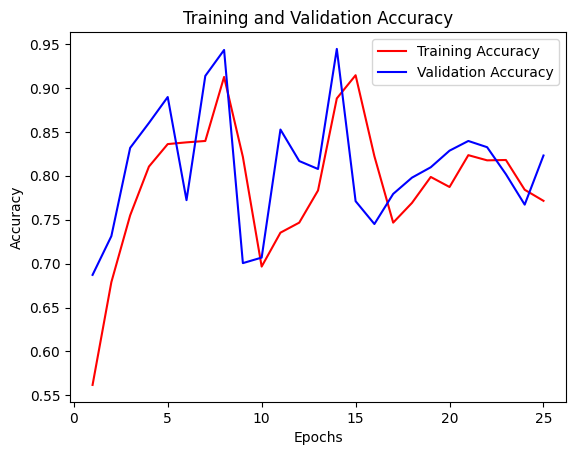

In [53]:
# Extracting the number of epochs from the training history
num_epochs = len(training_history.history['accuracy'])
epochs = range(1, num_epochs + 1)

# Plotting the training and validation accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [54]:
print(training_history.history.keys())
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Found 2538 files belonging to 3 classes.


In [57]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2538/2538 [==============================] - 26s 10ms/step


In [58]:
Y_true
predicted_categories
from sklearn.metrics import classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                     precision    recall  f1-score   support

            Acne and Rosacea Photos       0.74      0.85      0.79       840
                      Eczema Photos       0.91      0.83      0.87      1235
Melanoma Skin Cancer Nevi and Moles       0.80      0.76      0.78       463

                           accuracy                           0.82      2538
                          macro avg       0.81      0.81      0.81      2538
                       weighted avg       0.83      0.82      0.82      2538



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 